# Fundamentos em Data Science

## Gradiente Descendente

Fábio Sato <fabiosato@gmail.com>

# Gradiente Descendente

- Um dos algoritmos mais populares de otimização

- Utilizado durante o treinamento de diversos algoritmos de aprendizado de máquina (ex: redes neurais)

- Pode ser utilizado diretamente para resolver problemas de regressão linear

# Gradiente Descendente

- Minimização de funções

- Dada uma função definida por um conjunto de parâmetros, o algoritmo inicial com um conjunto de valores iniciais
e **iterativamente** busca um conjunto de parâmetros "quase" ótimos que minimizem a função

- Fundamentação matemática baseada em cálculo diferencial. 

- "Pequenos" passos (*learning rate*) na direção contrária do gradiente da função de custo


# Gradiente Descendente - Regressão Linear


Um modelo de regressão linear consiste em algoritmo que encontre uma linha (ou hiperplano) que melhor se ajuste
a um conjunto de dados.

<img src="figuras/gradient-descent-linear-regression.jpg" width="40%">

# Gradiente Descendente - Função de Custo

Para ${\rm I\!R}^2$, o objetivo é encontrar uma reta definida por $y = mx + b$, onde $m$ representa o ângulo de inclinação da reta e $b$ é o ponto onde a linha intercepta o eixo y.

O problema se resume então a encontrar o melhor conjunto de parâmetros $m$ e $b$.

Uma abordagem comum neste tipo de problema é definir a função de erro (ou função de custo) que mede a qualidade de uma determinada solução.

Esta função deve receber $m$ e $b$ como parâmetros e retornar um valor de erro baseado na distância/distribuição dos dados em relação a reta.


# Gradiente Descendente - Soma do Quadrado dos Erros

Uma função de custo apropriada para este problema é a soma do quadrado dos erros que garante que o valor do erro sempre é positivo e que pontos em distâncias opostas não se anulem.


$$ SSE = \frac{1}{N} \sum_{i=1}^{N}{(y_i - (mx + b))^{2}} $$


# Gradiente Descendente - Superfície de Erro

Linhas que se ajustem melhor aos dados irão resultar em menores valores de erro

Ao minimizarmos a função de erro iremos encontrar o melhor conjunto de parâmetros (solução) para nosso problema.


# Gradiente Descendente - Superfície de Error

Para ${\rm I\!R}^2$ nós podemos visualizar o espaço de soluções representadas através de uma superfície de erro bidimensional

<img src="figuras/gradient-descent-error-surface.png" width="40%">

# Gradiente Descendente - Busca Descendente

Cada ponto neste espaço bidimensional consiste em um par de parâmetros $m$ e $b$ que representam soluções de linhas.

A altura de cada ponto é o valor do erro e pode-se visualizar facilmente que existe uma região de mínimo que produzem
parâmetros que apresentam menores erros.

# Gradiente Descendente - Menor Erro

O algoritmo de gradiente descendente consiste em iniciar a busca em algum lugar desta superfície e mover-se *descendo*
esta superfície para encontrar a posição do menor erro.

Para realizar esta busca é necessário calcular o gradiente da função de erro. O gradiente irá agir como uma bússola apontando a direção de descida.

# Gradiente Descendente - Gradiente

O gradiente da função de erro é um vetor de derivadas parciais que dão a inclinação de cada ponto da superfície nas duas direções

$$ \nabla(J) = \Big[ \frac{\partial J}{\partial m}, \frac{\partial J}{\partial b} \Big] $$




# Gradiente Descendente - Cálculo

Para obter o gradiente precisamos obter as derivadas parciais da função de erro para os parâmetros $m$ e $b$.

$$ \frac{\partial J}{\partial m} = \frac{1}{2} \sum_{i=1}^{N}{-x_i (y_i - (m x_i + b))}$$

$$ \frac{\partial J}{\partial b} = \frac{1}{2} \sum_{i=1}^{N}{-(y_i - (m x_i + b))}$$

# Gradiente Descendente - Taxa de Aprendizado (Learning Rate)


Na busca da melhor solução o algoritmo de gradiente descendente caminha rapidamente na direção do ponto de mínimo e quando se aproxima de passa a caminhar cada vez mais devagar.

O tamanho do passo em cada iteração é determinado pelo valor do gradiente multiplicado por uma constante $\alpha$ (taxa de aprendizado).

Quanto mais próximo do valor do mínimo menor será a inclinação e portanto menor o gradiente, ou seja, menor será o tamanho do passo da iteração em direção ao mínimo.

# Gradiente Descendente - Aspectos da Taxa de Aprendizado

Passos pequenos permitem explorar de forma mais rigorosa o espaço de soluções (superfície de erro) permitindo encontrar uma solução mais precisa.

Entretanto, taxas de aprendizado muito pequenas podem apresentar um custo computacional elevado para convergência do algoritmo de busca.

Taxas de aprendizado altas podem fazer com que o algoritmo não encontre o mínimo global.

# Gradiente Descendente - Exemplo

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5

x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

In [8]:
# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])

In [33]:
# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.85
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))

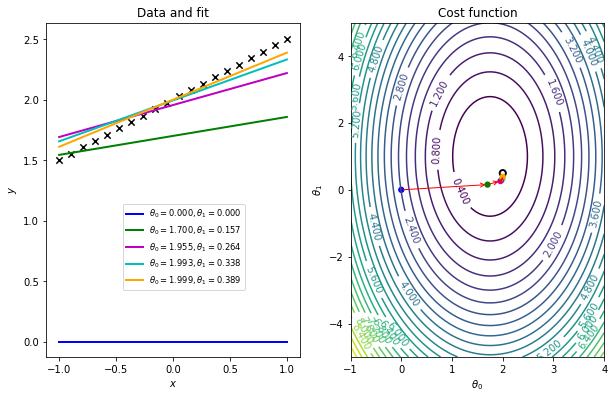

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')


X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))

for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
    
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()